Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
- trestbps — артериальное давление в покое
- chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
- thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [59]:
import pandas as pd
import category_encoders as ce
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df_heart = pd.read_csv('heart.csv')
display(df_heart.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [61]:
df_heart['old'] = df_heart['age'].apply(lambda x: 1 if x > 60 else 0)
display(df_heart['old'].sum())

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [62]:
def trestbps_mean(age=0, sex=0):
    """_определятель среднего систолического давления_

    Args:
        age (_int_): _возраст_
        sex (_int_): _пол_
    Return:
        result (_int_): _нормальное систолическое давление для переданного возраста_
    """
    if sex == 1:
        if age <= 20:
            return 123
        elif 21 <= age <= 30:
            return 126
        elif 31 <= age <= 40:
            return 129
        elif 41 <= age <= 50:
            return 135
        elif 51 <= age:
            return 142
    elif sex == 0:
        if age <= 20:
            return 116
        elif 21 <= age <= 30:
            return 120
        elif 31 <= age <= 40:
            return 127
        elif 41 <= age <= 50:
            return 137
        elif 51 <= age <= 60:
            return 144
        elif 61 <= age:
            return 159        

In [63]:
#df_heart['trestbps_mean'] = df_heart.apply(trestbps_mean(age=df_heart['age'], sex=df_heart['sex']))
df_heart['trestbps_mean'] = df_heart.apply(lambda x: trestbps_mean(x['age'], x['sex']), axis=1)
display(df_heart.iloc[300])

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

In [64]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df_heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
df_heart = pd.concat([df_heart, type_bin], axis=1)
df_heart = df_heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis = 1) # Удаляем исходные признаки

d:\Python\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\Python\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\Python\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.inf

In [65]:
df_heart.info

<bound method DataFrame.info of      age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  target  old  ...  \
0     63    1       145   233    1      150      0      2.3       1    1  ...   
1     37    1       130   250    0      187      0      3.5       1    0  ...   
2     41    0       130   204    0      172      0      1.4       1    0  ...   
3     56    1       120   236    0      178      0      0.8       1    0  ...   
4     57    0       120   354    0      163      1      0.6       1    0  ...   
..   ...  ...       ...   ...  ...      ...    ...      ...     ...  ...  ...   
298   57    0       140   241    0      123      1      0.2       0    0  ...   
299   45    1       110   264    0      132      0      1.2       0    0  ...   
300   68    1       144   193    1      141      0      3.4       0    1  ...   
301   57    1       130   131    0      115      1      1.2       0    0  ...   
302   57    0       130   236    0      174      0      0.0       0    0  ...

In [66]:
display(df_heart.head())

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0


Нормализуйте все числовые признаки подходящим способом.

In [73]:
# для нормализации, стандартизации
from sklearn import preprocessing
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
columns_to_normalize = ['chol', 'trestbps', 'thalach', 'age']
df_r = r_scaler.fit_transform(df_heart[columns_to_normalize])
# Создаем DataFrame с нормализованными значениями
df_r = pd.DataFrame(df_r, columns=columns_to_normalize)
# Объединяем нормализованные данные с оригинальным DataFrame, исключая нормализованные столбцы
df_heart = pd.concat([df_heart.drop(columns=columns_to_normalize), df_r], axis=1)
df_heart.describe()

,sex,fbs,exang,oldpeak,target,old,trestbps_mean,cp_3.0,cp_2.0,cp_1.0,...,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0,chol,trestbps,thalach,age
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.148515,0.326733,1.039604,0.544554,0.260726,141.669967,0.075908,0.287129,0.165017,...,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601,0.098646,0.081188,-0.103173,-0.046938
std,0.466011,0.356198,0.469794,1.161075,0.498835,0.439757,7.437821,0.265288,0.453171,0.371809,...,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110,0.816232,0.876907,0.704774,0.672748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.795276,-1.800000,-2.523077,-1.925926
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.456693,-0.500000,-0.600000,-0.555556
50%,1.000000,0.000000,0.000000,0.800000,1.000000,0.000000,142.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.600000,1.000000,1.000000,142.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.543307,0.500000,0.400000,0.444444
max,1.000000,1.000000,1.000000,6.200000,1.000000,1.000000,159.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.102362,3.500000,1.507692,1.629630


Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

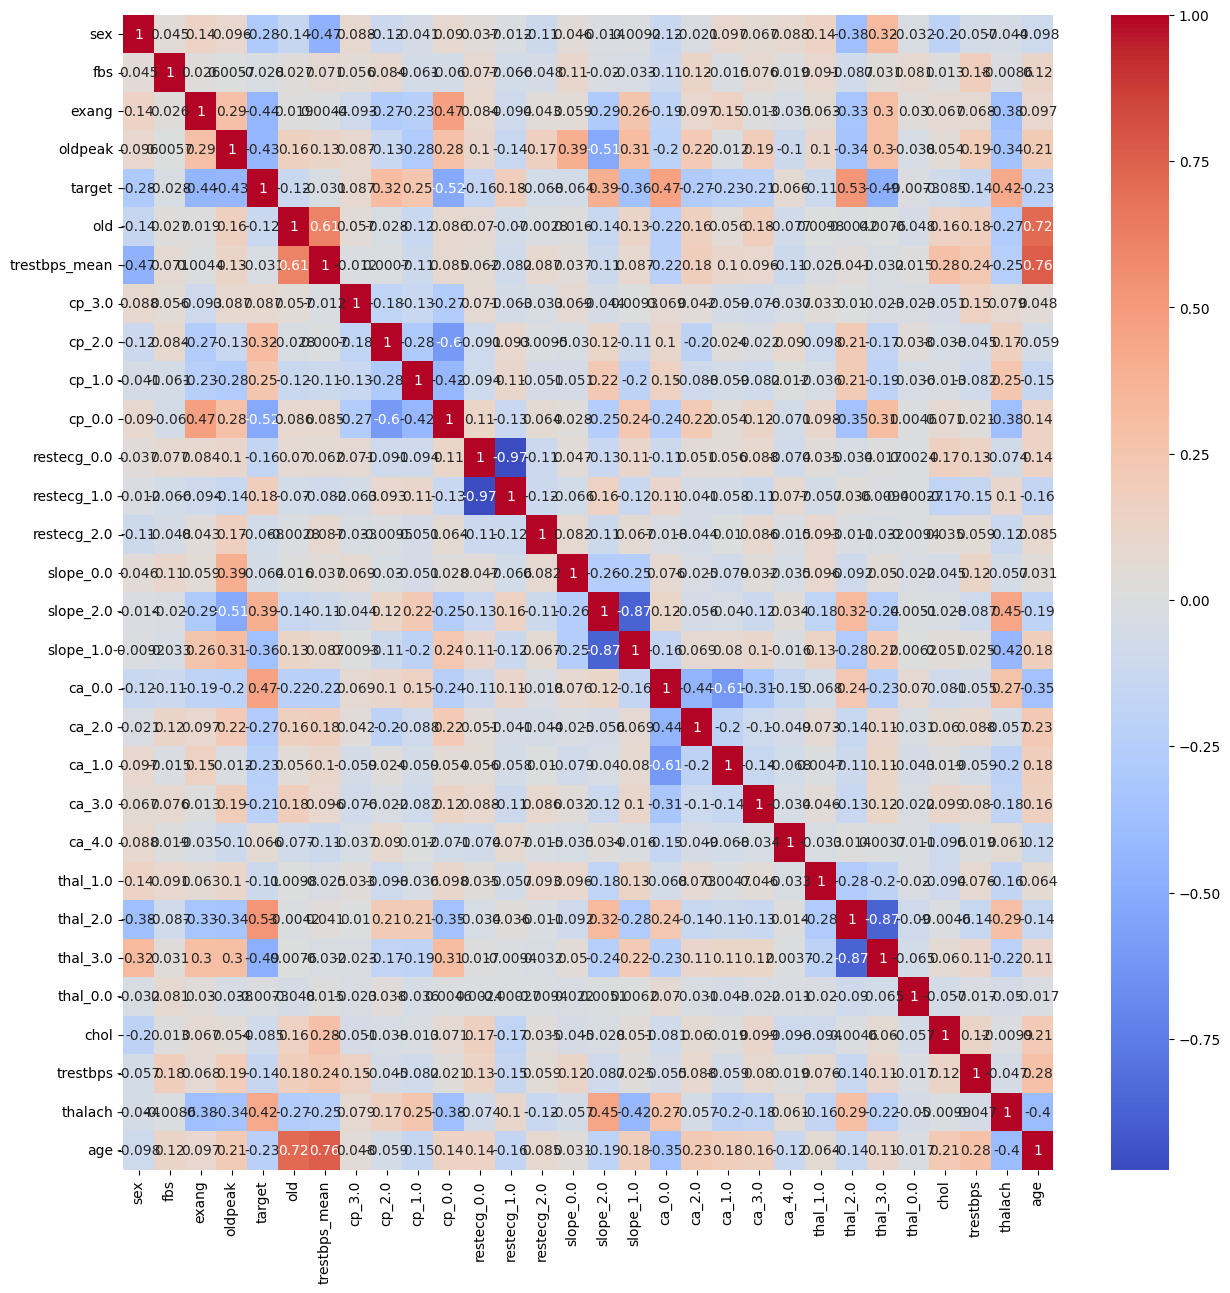

In [76]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
#sns.heatmap(df_heart.corr(numeric_only=True), annot=True)

import matplotlib.pyplot as plt

# Создание корреляционной матрицы
corr = df_heart.corr()

# Настройка размера фигуры
plt.figure(figsize=(15, 15))  # Увеличиваем размер фигуры

# Построение тепловой карты
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Отображение графика
plt.show()